In [4]:
import pandas as pd

data=pd.read_csv("18100205.csv")

data.head() #to display the first 5 lines of loaded data

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,NaN,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1


In [3]:
data.dtypes

REF_DATE                      object
GEO                           object
DGUID                         object
New housing price indexes     object
UOM                           object
UOM_ID                         int64
SCALAR_FACTOR                 object
SCALAR_ID                      int64
VECTOR                        object
COORDINATE                   float64
VALUE                        float64
STATUS                        object
SYMBOL                       float64
TERMINATED                   float64
DECIMALS                       int64
dtype: object

In [5]:
data = data[['REF_DATE', 'GEO', 'New housing price indexes', 'VALUE']].rename(columns = {'New housing price indexes' : 'HPI'})

In [6]:
data.head()

,REF_DATE,GEO,HPI,VALUE
0,1981-01,Canada,Total (house and land),38.2
1,1981-01,Canada,House only,36.1
2,1981-01,Canada,Land only,40.6
3,1981-01,Atlantic Region,Total (house and land),NaN
4,1981-01,Atlantic Region,House only,NaN


In [7]:
filtered_data1 = data.loc[data.GEO == 'Canada']

In [8]:
filtered_data = filtered_data1.loc[filtered_data1.HPI == 'Total (house and land)']

In [9]:
filtered_data.head()

,REF_DATE,GEO,HPI,VALUE
0,1981-01,Canada,Total (house and land),38.2
120,1981-02,Canada,Total (house and land),38.7
240,1981-03,Canada,Total (house and land),39.3
360,1981-04,Canada,Total (house and land),39.9
480,1981-05,Canada,Total (house and land),40.6


In [10]:
filtered_data2 = filtered_data[['REF_DATE', 'VALUE']]

filtered_data2.REF_DATE = pd.to_datetime(filtered_data2.REF_DATE)
filtered_data2.set_index('REF_DATE', inplace=True)

#filtered_data.index = pd.to_datetime(filtered_data.index, format='%Y-%m', errors='coerce').dropna()

filtered_data2.dtypes

filtered_data2.head()

C:\Users\t934449\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,VALUE
REF_DATE,
1981-01-01,38.2
1981-02-01,38.7
1981-03-01,39.3
1981-04-01,39.9
1981-05-01,40.6


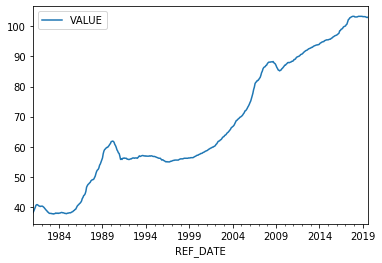

In [12]:
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


filtered_data2.plot()
plt.show()

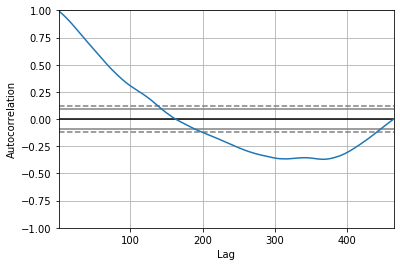

In [13]:
from pandas.plotting import autocorrelation_plot

#filtered_data2.VALUE = str(filtered_data2.VALUE)

autocorrelation_plot(filtered_data2)
plt.show()

In [64]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = filtered_data2.VALUE
size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)+24):
    model = ARIMA(history, order=(5,1,4))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    if t< len(test) :
        obs = test[t]
        history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions[0:len(test)])
print('Test MSE: %.3f' % error)
# plot


In [66]:
#test.head()
#test.dtypes

import datetime
#import pandas as pd
#import numpy as np

init_date = datetime.datetime.strptime('2018-11-01', '%Y-%m-%d')
index = pd.date_range(init_date, periods=34, freq='MS')

columns = ['VALUE']

predictions_ = pd.DataFrame(predictions, index=index, columns=columns)
#predictions_.head(12)


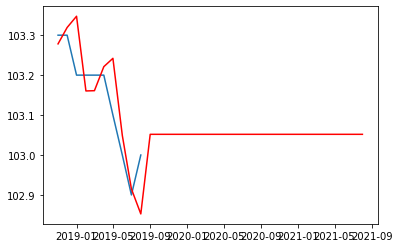

In [67]:
#plt.plot(train)
plt.plot(test)
plt.plot(predictions_, color='red')
plt.show()